<a href="https://colab.research.google.com/github/Pranav2612000/course.fast.ai/blob/main/lesson1/General_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download packages and imports

In [ ]:
!pip install duckduckgo_search
!pip install fastai

In [ ]:
from duckduckgo_search import ddg_images
from time import sleep

from fastcore.all import *
from fastai.vision.all import *
from fastdownload import download_url

## Configuration Variables

In [ ]:
CATEGORIES = ["batman", "superman", "shaktiman"]
SEARCH_TERMS = {
    "batman": ["batman potrait", "batman comic", "batman headshot"],
    "superman": ["superman potrait", "superman comic", "superman headshot"]
}

## Get Training Data

In [ ]:
def search_images(term, max_images = 30):
  print(f"Searching for '{term}'")
  return L(ddg_images(term, max_results = max_images)).itemgot('image')

In [ ]:
SEARCH_TERMS["batman"]

['batman potrait', 'batman comic', 'batman headshot']

In [ ]:
!rm training_images -rf

In [ ]:
path = Path('training_images')

for o in CATEGORIES:
  dest = (path/o)
  dest.mkdir(exist_ok=True, parents=True)

  if SEARCH_TERMS and o in SEARCH_TERMS.keys():
    for term in SEARCH_TERMS[o]:
      download_images(dest, urls = search_images(term))
      sleep(10)
  else:
    download_images(dest, urls = search_images(o))
    sleep(10)

Searching for 'batman potrait'
Searching for 'batman comic'
Searching for 'batman headshot'
Searching for 'superman potrait'
Searching for 'superman comic'
Searching for 'superman headshot'
Searching for 'shaktiman'


In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
print(f'Removed {len(failed)} incorrectly downloaded images')

Removed 10 incorrectly downloaded images


## Training the model

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = [Resize(192, method='squish')]
).dataloaders(path, bs=32)

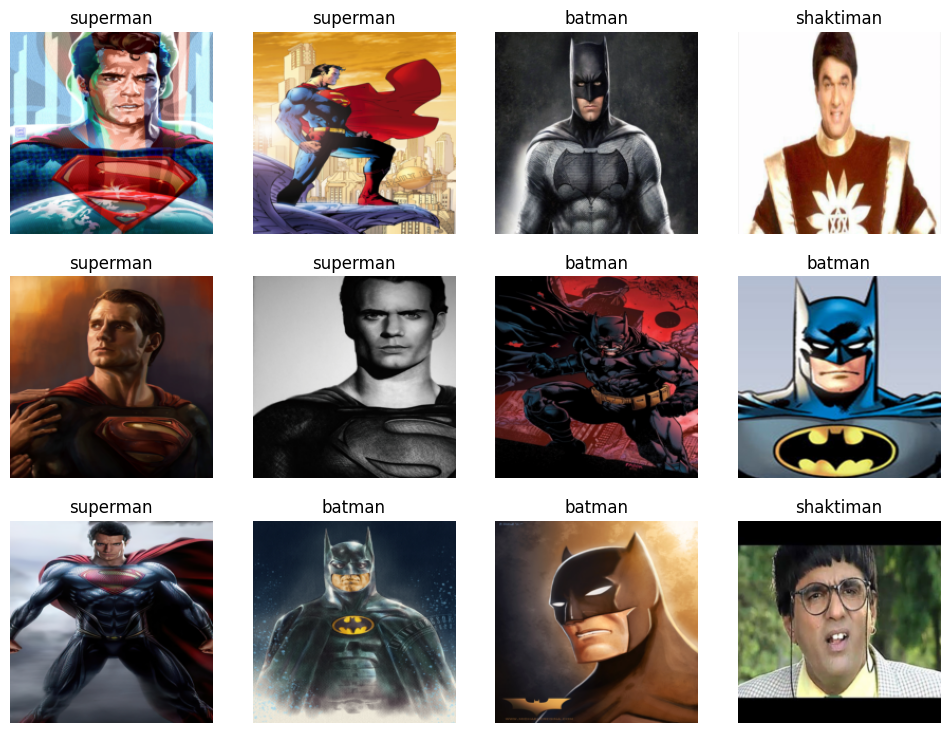

In [ ]:
# dls.show_batch(max_n = 12)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 195MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.696138,1.084951,0.416667,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.973088,0.546605,0.250000,00:21
1,0.598375,0.256582,0.111111,00:22
2,0.435518,0.208852,0.083333,00:24


## Testing the model

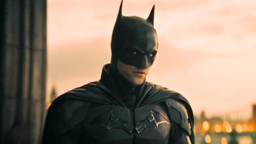

Category: shaktiman.
Probability: 0.0364


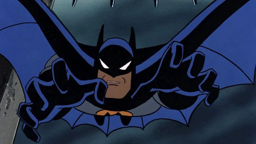

Category: batman.
Probability: 0.9889


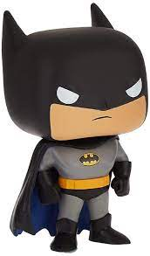

Category: superman.
Probability: 0.0190


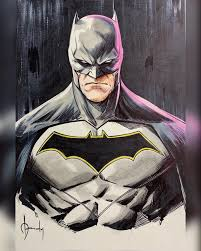

Category: batman.
Probability: 0.9510


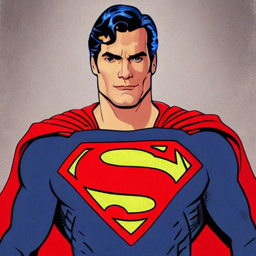

Category: superman.
Probability: 0.0001


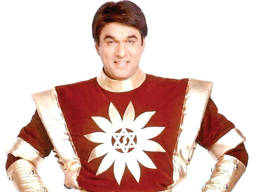

Category: shaktiman.
Probability: 0.0000


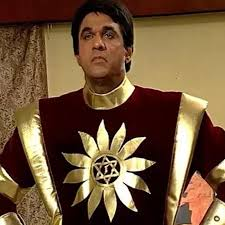

Category: shaktiman.
Probability: 0.0000


In [62]:
test_images = [
    "https://imageio.forbes.com/blogs-images/scottmendelson/files/2018/10/MV5BNzBhYTAxODEtNTAxNC00OWEyLWI5YmQtZjJiODJhMGFmNDM5XkEyXkFqcGdeQXVyMDc2NTEzMw@@._V1_SX1336_CR001336999_AL_-1200x674.jpg?format=jpg&width=1200",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTm5Es0wPoxFxlo26aU_bvtifmBrBplCOiD7w&usqp=CAU",
    "https://neural.love/cdn/ai-photostock/1ed5780b-19ed-6d7e-b309-a7ff290a1d64/2.jpg?Expires=1698796799&Signature=y0pP7KKWPlBp2S69lqidnR0jvWI8bmtddIQaM77NZx53BPE0DHA9u~mWzfedrF5e~tAn3e0CznrSK7WGH~qiKXAeApyLHa87U3kIwyiCY4QaR4xsBztCwargfmPWmq0OL7ab6teNJ4pIQkNmCAI6LbCR0I3sYnEJ8A2m3c-pqFys16YJjDdQvguiBnIZndmuPqf6RZqYOZ5HKJUh6z5Z9wUXAur85gciWdp5qImuCb09WSoOpHzXcc5Md2PIEd6mFuIFTx-4gfeQtIuTmRfpvCFLQD1NqYRLGRUpHYQSXXd058r899X64HLVmQHRodU554L0h9u~dYDjSzbWe8LznA__&Key-Pair-Id=K2RFTOXRBNSROX",
    "https://ngs-space1.sgp1.digitaloceanspaces.com/am/uploads/mediaGallery/image/1644515657225.jpg-org",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSy3esYZUEyWbSY20klOK6K-UD7c9-c0d_LCw&usqp=CAU"
]

path = Path('testing_images')

path.mkdir(exist_ok=True, parents=True)

for [index, img_url] in enumerate(test_images):
  try:
    img_path = (path/(f'{index}.jpg'))
    download_url(img_url, img_path, show_progress=False)
    pred_cat, _, probs = learn.predict(PILImage.create(img_path))
    img = Image.open(img_path).to_thumb(256, 256)
    display(img)
    print(f'Category: {pred_cat}')
    print(f'Probability: {probs[0]:.4f}')
  except:
    print(f"Error with image at index {index}. Skipping...")